In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#load csv file data with headers

location = "../datasets/DC_Properties.csv"
df = pd.read_csv(location)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#delete columns and group by quadrant
cleanup = df.drop(['Unnamed: 0','USECODE', 'STRUCT', 'STYLE','LANDAREA', 'GIS_LAST_MOD_DTTM', 'CMPLX_NUM', 'LIVING_GBA', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y'], axis=1)
quadgroup = cleanup.groupby('QUADRANT')
cleanup.groupby('QUADRANT').mean()


,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,ZIPCODE
QUADRANT,,,,,,,,,,,,,,,,
NE,1.701898,0.494731,1.210251,6.500279,2.936430,1938.669907,2001.402331,1962.879469,2.019983,3.928715e+05,1.690352,1432.601193,1.000212,1.221450,0.452157,20010.505773
NW,1.910749,0.453040,1.174555,6.053702,2.662900,1940.617154,1997.112567,1962.692888,2.172538,1.317785e+06,1.704678,2019.785716,1.000501,1.207613,3.914616,20011.784992
SE,1.674478,0.451660,1.226914,6.375918,2.803703,1947.436804,1998.071729,1967.202542,2.015935,3.682260e+05,1.592345,1450.172876,1.001543,1.236684,0.314171,20016.709852
SW,1.501591,0.269033,1.320330,4.899878,1.863647,1966.782758,2004.141601,1970.911383,2.084209,3.470489e+05,1.633782,1375.419355,1.000000,1.328582,0.096940,20025.848225


In [5]:
cleanup['QUADRANT'].value_counts()

NW    89736
NE    37675
SE    27224
SW     4085
Name: QUADRANT, dtype: int64

In [6]:
#preparing for stackplot by assigning each y-value to a quadrant using grouping
y1 = cleanup.groupby(cleanup['QUADRANT'] == 'NW').mean()
y2 = cleanup.groupby(cleanup['QUADRANT'] == 'NE').mean()
y3 = cleanup.groupby(cleanup['QUADRANT'] == 'SE').mean()
y4 = cleanup.groupby(cleanup['QUADRANT'] == 'SW').mean()

In [ ]:
#stackplot with quadrants as each stack, comparing price and square footage
#EXPERIENCING AN ISSUE
x = 'PRICE'


#y = 'SQUARE'

y = np.vstack([y1, y2, y3, y4])

labels = ["NW ", "NE", "SE", "SW"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, y4, labels = labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()


In [7]:
#number of null Quadrant rows
cleanup.isnull().sum()

BATHRM              0
HF_BATHRM           0
HEAT                0
AC                  0
NUM_UNITS       52261
ROOMS               0
BEDRM               0
AYB               271
YR_RMDL         78029
EYB                 0
STORIES         52305
SALEDATE        26770
PRICE           60741
QUALIFIED           0
SALE_NUM            0
GBA             52261
BLDG_NUM            0
GRADE           52261
CNDTN           52261
EXTWALL         52261
ROOF            52261
INTWALL         52261
KITCHENS        52262
FIREPLACES          0
SOURCE              0
FULLADDRESS     52917
CITY            52906
STATE           52906
ZIPCODE             1
NATIONALGRID    52906
QUADRANT          237
dtype: int64

In [8]:
#delete null Quadrant rows
cleanup.dropna(subset=['QUADRANT'], inplace=True)

In [9]:
#recheck null rows
cleanup.isnull().sum()

BATHRM              0
HF_BATHRM           0
HEAT                0
AC                  0
NUM_UNITS       52261
ROOMS               0
BEDRM               0
AYB               271
YR_RMDL         77885
EYB                 0
STORIES         52305
SALEDATE        26705
PRICE           60605
QUALIFIED           0
SALE_NUM            0
GBA             52261
BLDG_NUM            0
GRADE           52261
CNDTN           52261
EXTWALL         52261
ROOF            52261
INTWALL         52261
KITCHENS        52262
FIREPLACES          0
SOURCE              0
FULLADDRESS     52916
CITY            52905
STATE           52905
ZIPCODE             0
NATIONALGRID    52905
QUADRANT            0
dtype: int64

AttributeError: 'str' object has no attribute 'conjugate'

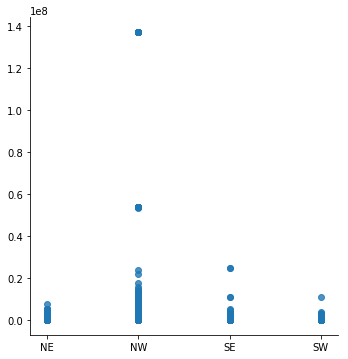

In [10]:
#Relation between Price and Quadrant
sns.lmplot(x='QUADRANT', y='PRICE', data=cleanup)

In [12]:
#closer look at NW Quadrant
northwest = cleanup[ cleanup['QUADRANT'] == 'NW' ]
cleanup[ cleanup['QUADRANT'] == 'NW' ]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,INTWALL,KITCHENS,FIREPLACES,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,Hardwood,2.0,5,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,Hardwood,2.0,4,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,Hardwood,2.0,4,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,Hardwood,2.0,3,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,Hardwood,1.0,0,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,NW
5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,...,Hardwood,1.0,4,Residential,1709 S STREET NW,WASHINGTON,DC,20009.0,18S UJ 23157 09248,NW
6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,1957,...,Hardwood,2.0,0,Residential,1769 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23042 09323,NW
7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,1972,...,Hardwood,2.0,1,Residential,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,18S UJ 23124 09368,NW
8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,1967,...,Hardwood,2.0,1,Residential,1727 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23142 09324,NW
9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,1950,...,Hardwood,1.0,0,Residential,1733 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23127 09324,NW


In [15]:
#only want residential properties
northwestres = northwest[ northwest['SOURCE'] == 'Residential']
northwest[ northwest['SOURCE'] == 'Residential']

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,INTWALL,KITCHENS,FIREPLACES,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,Hardwood,2.0,5,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,Hardwood,2.0,4,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,Hardwood,2.0,4,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,Hardwood,2.0,3,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,Hardwood,1.0,0,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,NW
5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,...,Hardwood,1.0,4,Residential,1709 S STREET NW,WASHINGTON,DC,20009.0,18S UJ 23157 09248,NW
6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,1957,...,Hardwood,2.0,0,Residential,1769 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23042 09323,NW
7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,1972,...,Hardwood,2.0,1,Residential,1746 1/2 T STREET NW,WASHINGTON,DC,20009.0,18S UJ 23124 09368,NW
8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,1967,...,Hardwood,2.0,1,Residential,1727 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23142 09324,NW
9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,1950,...,Hardwood,1.0,0,Residential,1733 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23127 09324,NW


In [17]:
#discover stats
northwestres.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,ZIPCODE
count,50517.000000,50517.000000,50517.000000,50517.000000,50517.000000,50425.000000,26123.000000,50517.000000,50502.000000,2.748200e+04,50517.000000,50517.000000,50517.000000,50517.000000,50517.000000,50517.000000
mean,2.332205,0.688501,1.174555,7.892749,3.669893,1927.398770,2001.431191,1966.761367,2.172538,7.901680e+05,1.602015,2019.785716,1.000891,1.207613,0.934814,20010.345923
std,1.142275,0.644606,0.520442,2.307335,1.157154,24.623886,18.633877,14.617580,2.095519,7.342291e+05,1.240240,1056.577342,0.031132,0.539415,1.016009,5.023399
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1925.000000,0.000000,1.000000e+01,1.000000,0.000000,1.000000,0.000000,0.000000,20001.000000
25%,1.000000,0.000000,1.000000,6.000000,3.000000,1912.000000,1996.000000,1957.000000,2.000000,3.837975e+05,1.000000,1394.000000,1.000000,1.000000,0.000000,20008.000000
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1925.000000,2006.000000,1966.000000,2.000000,6.600000e+05,1.000000,1734.000000,1.000000,1.000000,1.000000,20011.000000
75%,3.000000,1.000000,1.000000,9.000000,4.000000,1937.000000,2011.000000,1972.000000,2.250000,9.500000e+05,1.000000,2370.000000,1.000000,1.000000,1.000000,20012.000000
max,14.000000,9.000000,6.000000,48.000000,24.000000,2019.000000,2018.000000,2018.000000,275.000000,2.396029e+07,14.000000,45384.000000,3.000000,6.000000,13.000000,20052.000000


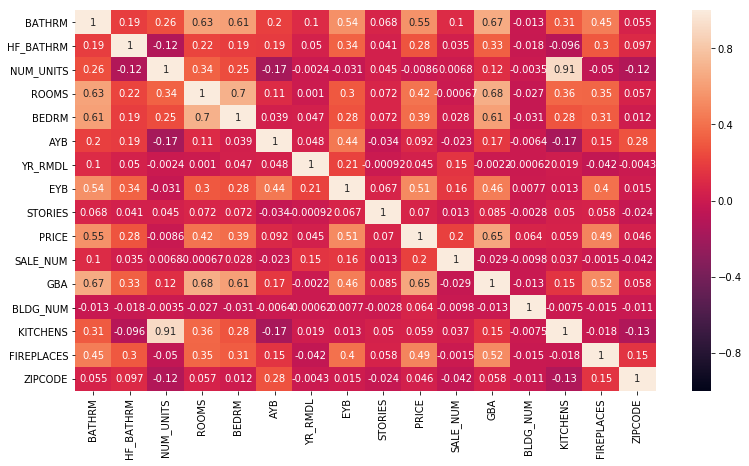

In [28]:
#show correlation of stats via heatmap
corr = northwestres.corr()
plt.figure(figsize=(13,7))

sns.heatmap(corr, vmin=-1, annot=True)